In [129]:
import numpy as np
import random
from matplotlib import pyplot as plt
import math
import os
import cv2

dataset = np.load('mars_for_students.npz')

In [130]:
dataset.files

['training_set', 'test_set']

In [185]:
training_set = dataset['training_set']
X_train = training_set[:, 0]
y_train = training_set[:, 1]

X_test = dataset['test_set']

print(f'Training X shape: {X_train.shape}')
print(f'Training y shape: {y_train.shape}')
print(f'Test X shape: {X_test.shape}')

Training X shape: (2615, 64, 128)
Training y shape: (2615, 64, 128)
Test X shape: (10022, 64, 128)


In [133]:
def visualize_random_images(data, n=5):
    """
    Displays n random images from the dataset in a grid layout with a max of 3 images per row.

    :param data: The dataset containing the images (assumed to be a NumPy array).
    :param n: Number of random images to display (default: 5).
    """
    # Ensure n does not exceed the total number of images in the set
    max_images = data.shape[0]
    n = min(n, max_images)

    # Select n random indices
    indices = random.sample(range(max_images), n)
    selected_images = [data[i] for i in indices]

    # Calculate the number of rows (max 3 images per row)
    num_rows = math.ceil(n / 3)

    # Plot the selected images
    plt.figure(figsize=(15, num_rows * 5))  # Adjust the figure size based on the number of rows
    for i, img in enumerate(selected_images):
        plt.subplot(num_rows, 3, i + 1)  # Arrange images in rows of 3
        plt.imshow(img, cmap='gray')  # Display images in grayscale
        plt.axis('off')  # Remove axes for better visualization
        plt.title(f"Image {indices[i]}")  # Display the index of each image
    plt.show()

In [134]:
def count_duplicates(images):

    image_hashes = {}

    for i, img in enumerate(images):
        img_hash = hash(img.tobytes())

        if img_hash in image_hashes:
            image_hashes[img_hash].append(i)
        else:
            image_hashes[img_hash] = [i]

    # Create a summary of duplicates
    duplicates_count = {indices[0]: len(indices) for indices in image_hashes.values() if len(indices) > 1}
    return duplicates_count

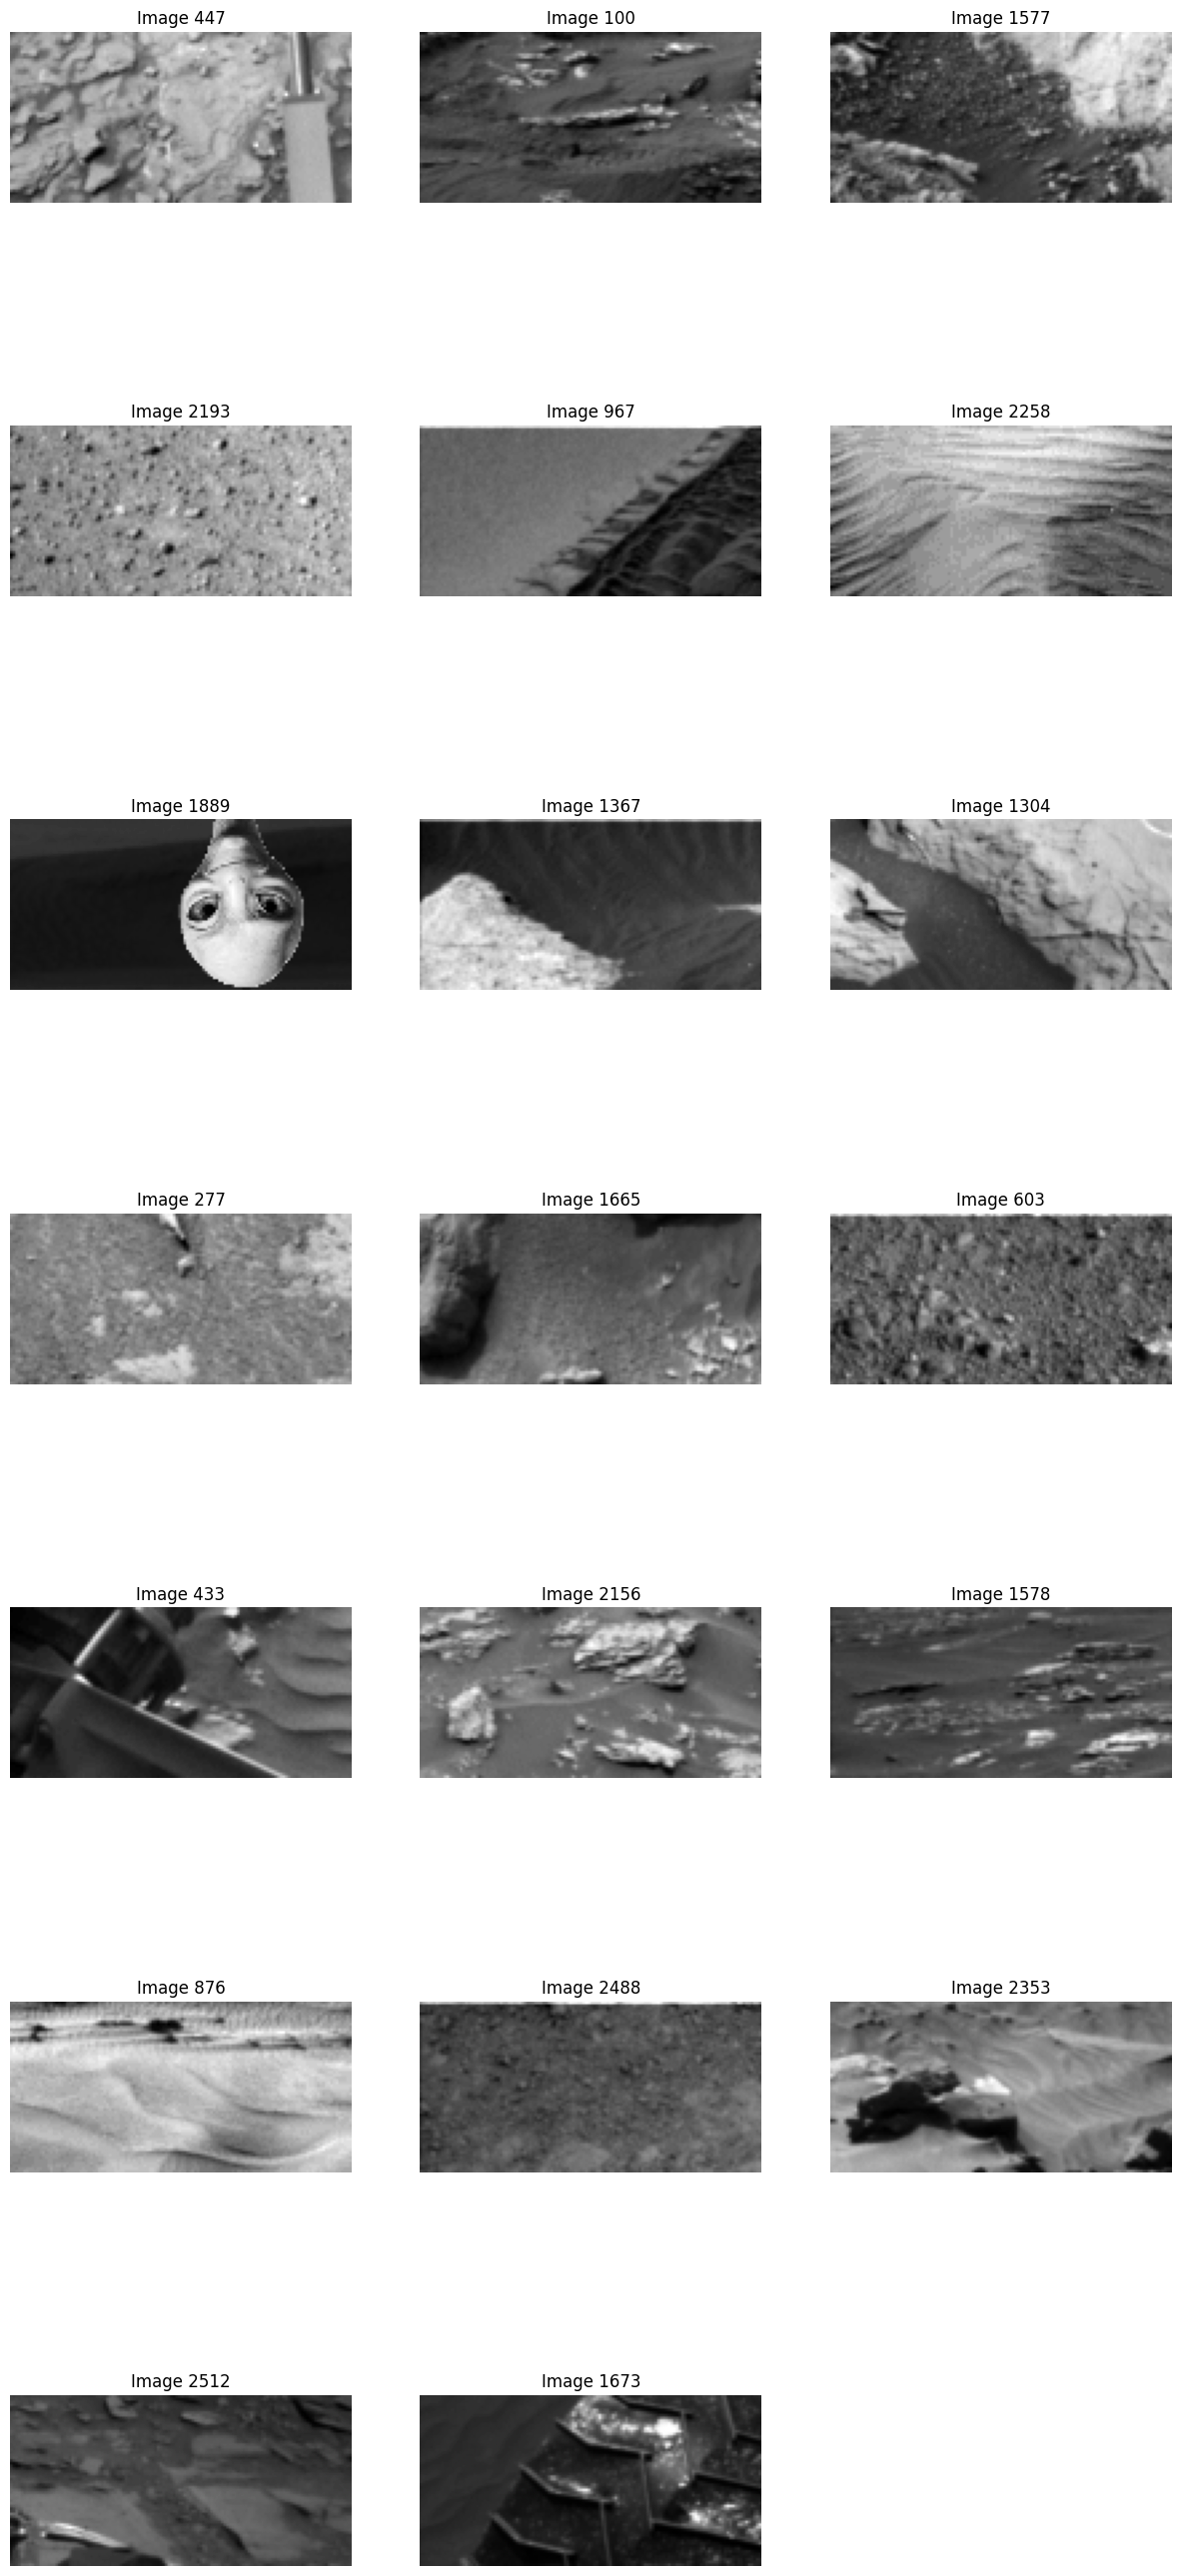

In [120]:
visualize_random_images(X_train, 20)

In [135]:
duplicates = count_duplicates(y_train)
print(duplicates)

{5: 26, 9: 40, 13: 95, 17: 5, 19: 235, 22: 88, 24: 49, 37: 4, 48: 13, 54: 10, 55: 2, 62: 110, 81: 2, 85: 9, 124: 15, 135: 10, 149: 28, 164: 9, 172: 10, 227: 24, 256: 2, 291: 2, 296: 4, 305: 3, 344: 15, 409: 4, 438: 7, 495: 7, 582: 2, 602: 6, 603: 4, 702: 3, 759: 9, 1203: 3, 1427: 2, 1472: 3, 1783: 2, 1789: 2, 2071: 2}


In [172]:
color_map = {
    0: (0, 0, 0), # background
    1: (0, 255, 0),
    2: (0, 0, 255),
    3: (255, 255, 0),
    4: (255, 0, 255)
}

def apply_colormap(img):
    colored_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    for label, color in color_map.items():
        colored_image[img == label] = color

    return colored_image

In [173]:
def show_duplicates(duplicates_dict, images = y_train):
    # Plot duplicates
    print(f"Found {len(duplicates_dict)} unique images with duplicates.")
    fig, axes = plt.subplots(len(duplicates_dict), 1, figsize=(8, len(duplicates_dict) * 4))

    if len(duplicates_dict) == 1:
        axes = [axes]  # Ensure consistent handling for one row

    for i, (index, count) in enumerate(duplicates.items()):

        img = images[index]

        colored_image = apply_colormap(img)

        axes[i].imshow(colored_image)
        axes[i].set_title(f"Image {index}, {count} duplucates")
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

In [204]:
def show_images_from_specified_class(labels, selected_class = 4, n = 10, threshold = 0.1):
    selected_images = {}
    indexes = []
    for i, img in enumerate(labels):
        # Count the number of pixels of the selected class
        class_pixels = np.sum(img == selected_class)
        total_pixels = img.size
        class_percentage = class_pixels / total_pixels

        if class_percentage >= threshold:
            selected_images.update({i: img})
            indexes.append(i)

    plt.figure(figsize = (15, 50))
    for k, (i, img) in enumerate(selected_images.items()):

        colored_image = apply_colormap(img)

        plt.subplot(n // 5, 5, k + 1)
        plt.imshow(colored_image)
        plt.title(f'Image {i}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    return indexes

In [210]:
def visualize_images(images, indices):
    num_images = len(indices)
    cols = 5
    rows = num_images // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
    axes = axes.flatten()

    i = 0
    for i, idx in enumerate(indices):
        axes[i].imshow(images[idx], cmap = 'gray')
        axes[i].set_title(f'Image {idx}')
        axes[i].axis('off')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


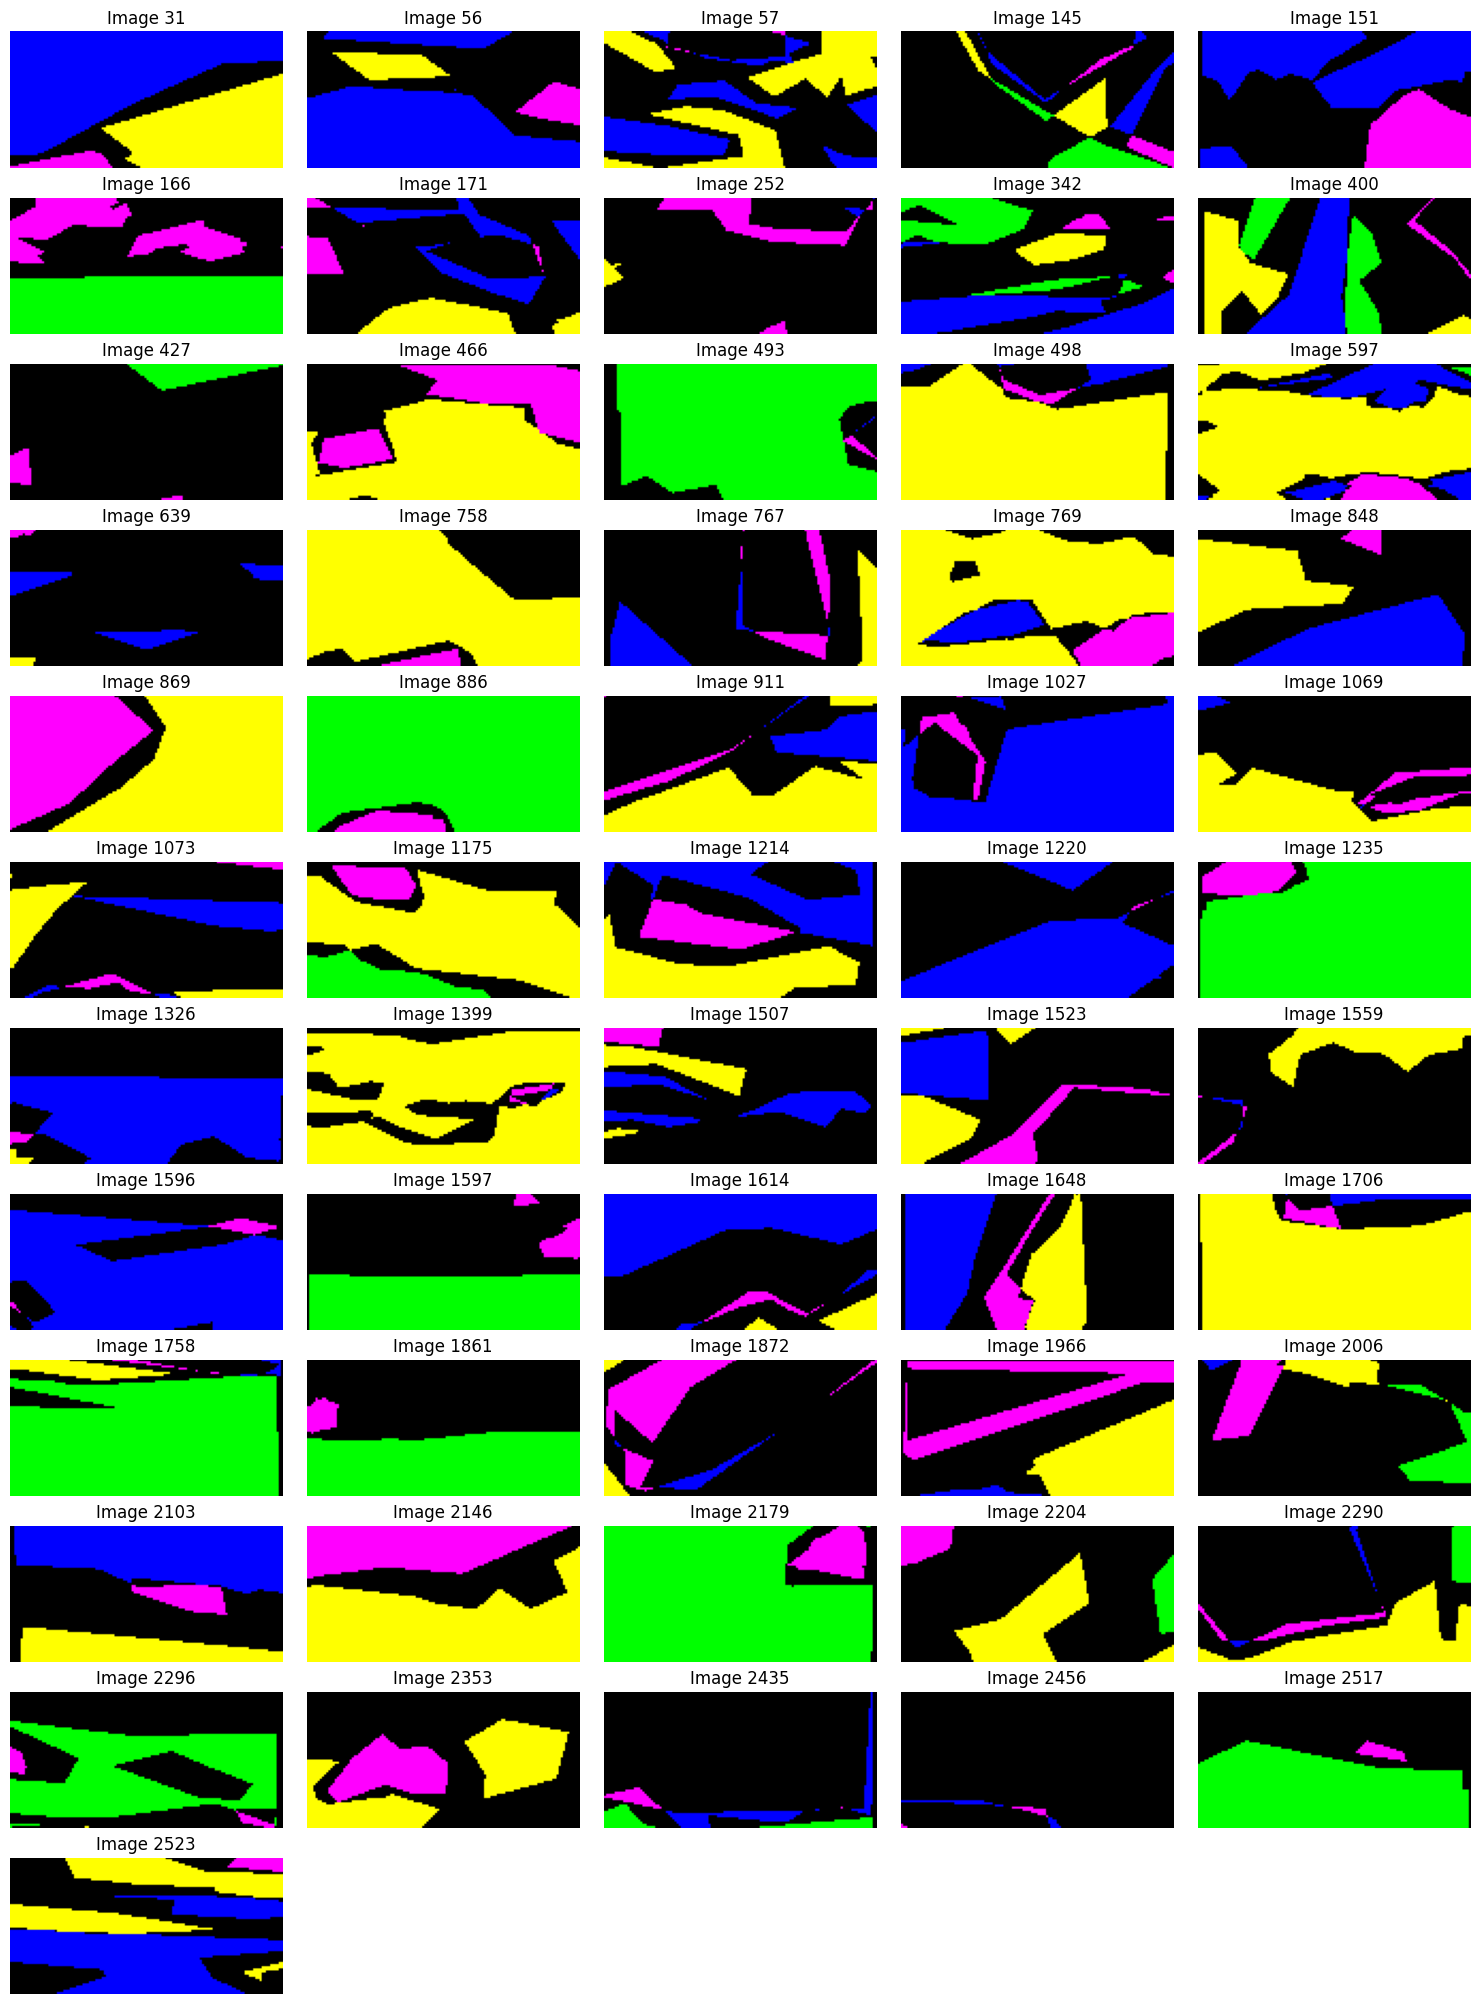

[31, 56, 57, 145, 151, 166, 171, 252, 342, 400, 427, 466, 493, 498, 597, 639, 758, 767, 769, 848, 869, 886, 911, 1027, 1069, 1073, 1175, 1214, 1220, 1235, 1326, 1399, 1507, 1523, 1559, 1596, 1597, 1614, 1648, 1706, 1758, 1861, 1872, 1966, 2006, 2103, 2146, 2179, 2204, 2290, 2296, 2353, 2435, 2456, 2517, 2523]
56


In [212]:
indexes = show_images_from_specified_class(y_train, n = 150, threshold = 0.001)

print(indexes)
print(len(indexes))

IndexError: index 55 is out of bounds for axis 0 with size 55

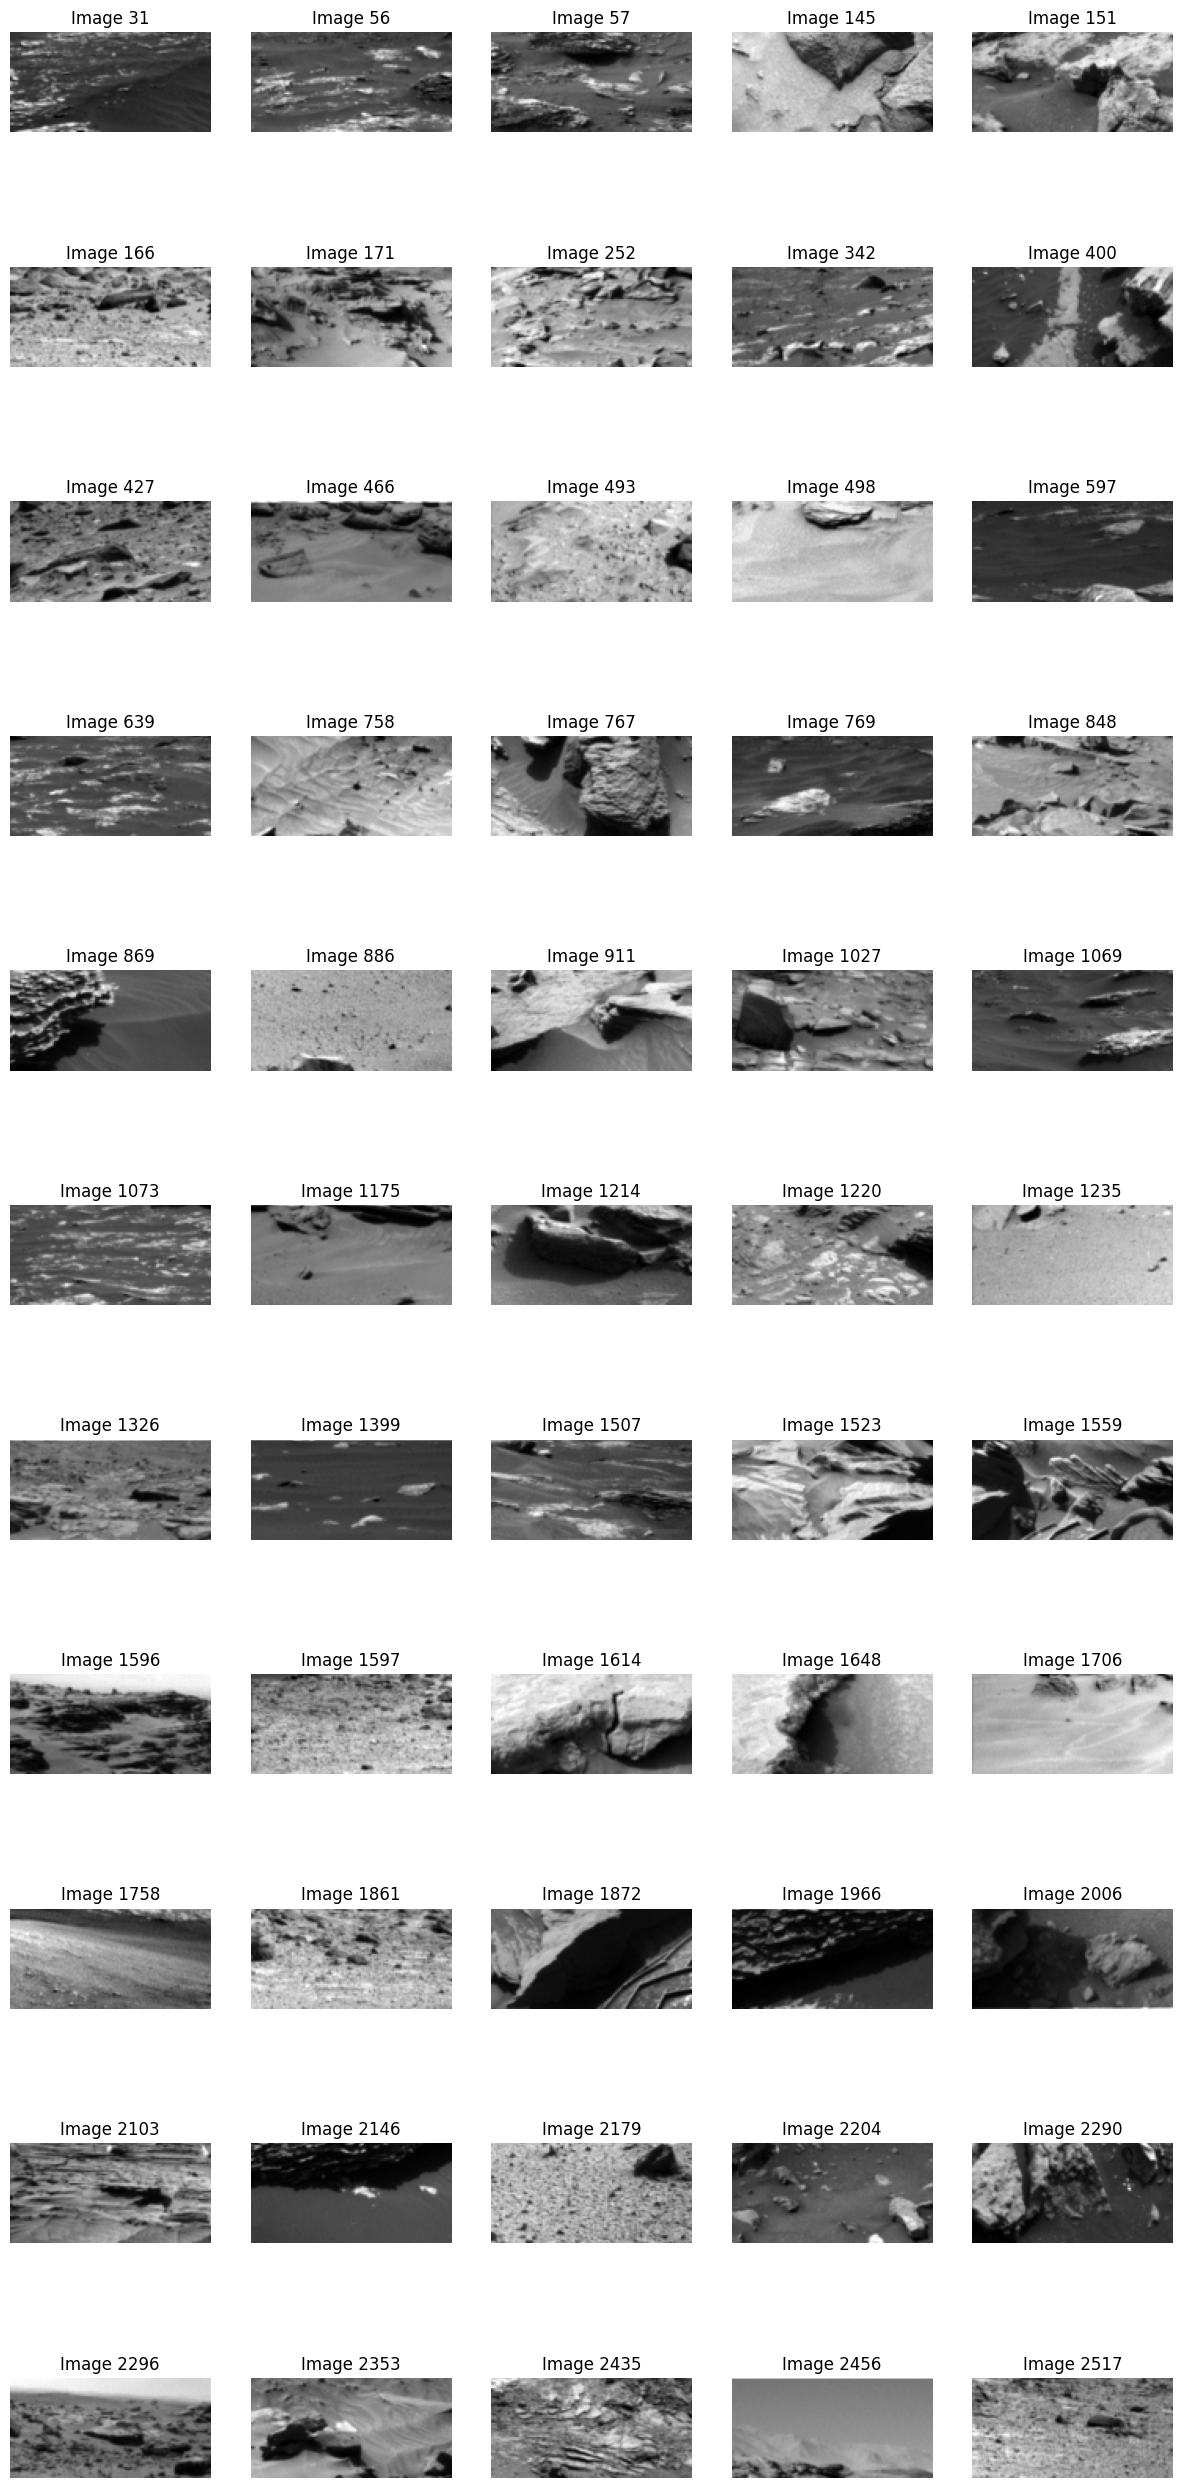

In [211]:
visualize_images(X_train, indexes)

Found 39 unique images with duplicates.


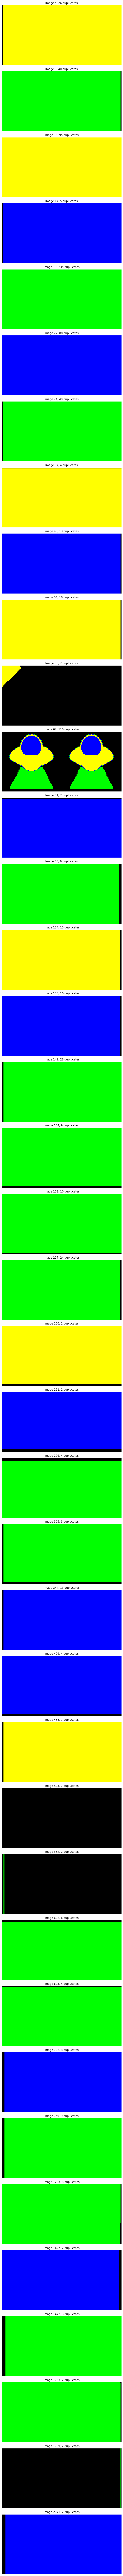

In [128]:
show_duplicates(duplicates, images = y_train)

In [140]:
from collections import Counter

def compute_class_distribution(labels):
    """
    Compute the distribution of classes across all label masks.

    Args:
        labels (list of np.ndarray): List of label arrays (ground truth masks).

    Returns:
        dict: Dictionary where keys are class labels and values are pixel counts.
    """
    class_counts = Counter()
    for label in labels:
        unique, counts = np.unique(label, return_counts=True)
        class_counts.update(dict(zip(unique.astype('uint'), counts)))
    return dict(class_counts)

def compute_class_percentage(class_counts):
    """
    Compute the percentage of each class based on its pixel count.

    Args:
        class_counts (dict): Dictionary with class labels as keys and pixel counts as values.

    Returns:
        dict: Dictionary where keys are class labels and values are percentages.
    """
    total_pixels = sum(class_counts.values())
    return {cls: (count / total_pixels) * 100 for cls, count in class_counts.items()}

def check_class_presence(labels, num_classes):
    """
    Check which classes are present in each label mask.

    Args:
        labels (list of np.ndarray): List of label arrays (ground truth masks).
        num_classes (int): Total number of classes in the dataset.

    Returns:
        list of list: Each element is a list of classes present in the corresponding label mask.
    """
    presence = []
    for label in labels:
        unique_classes = np.unique(label)
        presence.append(unique_classes.tolist())
    return presence

def compute_class_areas(labels):
    """
    Compute the area (number of pixels) of connected components for each class.

    Args:
        labels (list of np.ndarray): List of label arrays (ground truth masks).

    Returns:
        list of dict: For each mask, a dictionary where keys are classes and values are lists of connected component sizes.
    """
    from scipy.ndimage import label as nd_label

    class_areas = []
    for label in labels:
        areas = {}
        for cls in np.unique(label):
            cls_mask = (label == cls)
            labeled_array, num_features = nd_label(cls_mask)
            component_sizes = [np.sum(labeled_array == i) for i in range(1, num_features + 1)]
            areas[cls] = component_sizes
        class_areas.append(areas)
    return class_areas

def plot_class_distribution(class_counts):
    """
    Plot a bar chart showing the distribution of classes.

    Args:
        class_counts (dict): Dictionary with class labels as keys and pixel counts as values.
    """
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(8, 6))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Pixel Count')
    plt.title('Class Distribution')
    plt.xticks(classes)
    plt.grid(axis='y')
    plt.show()

{np.uint64(0): np.int64(5466886), np.uint64(2): np.int64(4863930), np.uint64(3): np.int64(3933183), np.uint64(1): np.int64(7131118), np.uint64(4): np.int64(26963)}


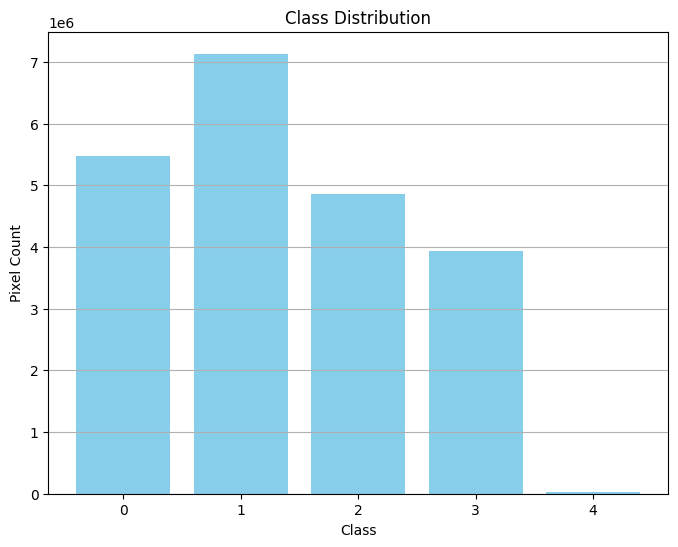

0.004932058213761911


In [142]:
class_counts = compute_class_distribution(y_train)
print(class_counts)
plot_class_distribution(class_counts)


In [97]:
def save_dataset_images(data, dirname, img_prefix, colormap=False):
    base_dir = os.getcwd()

    # Create the folder if it doesn't exist
    dataset_dir = os.path.join(base_dir, 'dataset_no_outliers')
    if not os.path.exists(dataset_dir):
        os.makedirs(dataset_dir)

    # Create a subfolder for the specific dataset (train, validation, etc.)
    specific_dir = os.path.join(dataset_dir, dirname)
    if not os.path.exists(specific_dir):
        os.makedirs(specific_dir)

    for i, img in enumerate(data):
        if colormap:
            colored_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
            for label, color in color_map.items():
                colored_image[img == label] = color
            img = colored_image

        img_filename = f'{img_prefix}{i}.png'
        img_path = os.path.join(specific_dir, img_filename)
        print(f'Saving image {i}')
        # Save the image using OpenCV
        cv2.imwrite(img_path, img)

In [98]:
save_dataset_images(X_train, 'X_train', 'train')

Saving image 0
Saving image 1
Saving image 2
Saving image 3
Saving image 4
Saving image 5
Saving image 6
Saving image 7
Saving image 8
Saving image 9
Saving image 10
Saving image 11
Saving image 12
Saving image 13
Saving image 14
Saving image 15
Saving image 16
Saving image 17
Saving image 18
Saving image 19
Saving image 20
Saving image 21
Saving image 22
Saving image 23
Saving image 24
Saving image 25
Saving image 26
Saving image 27
Saving image 28
Saving image 29
Saving image 30
Saving image 31
Saving image 32
Saving image 33
Saving image 34
Saving image 35
Saving image 36
Saving image 37
Saving image 38
Saving image 39
Saving image 40
Saving image 41
Saving image 42
Saving image 43
Saving image 44
Saving image 45
Saving image 46
Saving image 47
Saving image 48
Saving image 49
Saving image 50
Saving image 51
Saving image 52
Saving image 53
Saving image 54
Saving image 55
Saving image 56
Saving image 57
Saving image 58
Saving image 59
Saving image 60
Saving image 61
Saving image 62
Sa

In [99]:
save_dataset_images(X_test, 'X_test', 'test')

Saving image 0
Saving image 1
Saving image 2
Saving image 3
Saving image 4
Saving image 5
Saving image 6
Saving image 7
Saving image 8
Saving image 9
Saving image 10
Saving image 11
Saving image 12
Saving image 13
Saving image 14
Saving image 15
Saving image 16
Saving image 17
Saving image 18
Saving image 19
Saving image 20
Saving image 21
Saving image 22
Saving image 23
Saving image 24
Saving image 25
Saving image 26
Saving image 27
Saving image 28
Saving image 29
Saving image 30
Saving image 31
Saving image 32
Saving image 33
Saving image 34
Saving image 35
Saving image 36
Saving image 37
Saving image 38
Saving image 39
Saving image 40
Saving image 41
Saving image 42
Saving image 43
Saving image 44
Saving image 45
Saving image 46
Saving image 47
Saving image 48
Saving image 49
Saving image 50
Saving image 51
Saving image 52
Saving image 53
Saving image 54
Saving image 55
Saving image 56
Saving image 57
Saving image 58
Saving image 59
Saving image 60
Saving image 61
Saving image 62
Sa

In [100]:
save_dataset_images(y_train, 'y_train', 'y', colormap = True)


Saving image 0
Saving image 1
Saving image 2
Saving image 3
Saving image 4
Saving image 5
Saving image 6
Saving image 7
Saving image 8
Saving image 9
Saving image 10
Saving image 11
Saving image 12
Saving image 13
Saving image 14
Saving image 15
Saving image 16
Saving image 17
Saving image 18
Saving image 19
Saving image 20
Saving image 21
Saving image 22
Saving image 23
Saving image 24
Saving image 25
Saving image 26
Saving image 27
Saving image 28
Saving image 29
Saving image 30
Saving image 31
Saving image 32
Saving image 33
Saving image 34
Saving image 35
Saving image 36
Saving image 37
Saving image 38
Saving image 39
Saving image 40
Saving image 41
Saving image 42
Saving image 43
Saving image 44
Saving image 45
Saving image 46
Saving image 47
Saving image 48
Saving image 49
Saving image 50
Saving image 51
Saving image 52
Saving image 53
Saving image 54
Saving image 55
Saving image 56
Saving image 57
Saving image 58
Saving image 59
Saving image 60
Saving image 61
Saving image 62
Sa